# Background / Introduction and Business Problem Statement:

## Client - An Indian IT company planning to start up their overseas branch in New York.
![Alt text](NewYork.jpg)
### Requirement- 
The business demand of the IT services and solutions given to the various companies in USA is on rise. Due to new rule the US companies are not able to hire / get on-site the skilled Indian professionals. Thus this company wants to start their subsidiary in US to take care of customer requirements. They have to decide on the location of their new office in New York to open their office. 
We have been approached to do the study and suggest them an ideal location.
Business Problem - As initially they will be sending their Senior Management team from India to establish the subsidy, the concern from the company is to have least issue in settling for these people so that they work can start immediately and, if they needed can stay in on-site location for a longer time. 
As informed, is the team has to move for a duration of 2-3 years minimum for the subsidy to get stable then following parameters needs to be considered.

1.	Population rate
2.	Median house price 
3.	Eating Joints – Vegetarian joints availability is must. 
4.	Schools / Educational institutes ratings
5.	Weather conditions.
6.	Crime rates 
7.	Recreational facilities


This project helps the end user or the stakeholder to achieve the results which will not only recommend but also saves a lot of time in manual search. This will indeed save the time and money of the user.This projects core objective is to study the Neighborhoods with respect to above parameters and provide a detailed analysis to users which can help them decide the Final location of their new office. 

This project can be used by the user at the time of renting apartment or buying house in a locality based on the distribution of various facilities available around the neighborhood.This project would compare 2 randomly picked neighborhoods and analyses the top 10 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. Also, this project uses K-mean clustering unsupervised machine learning algorithm to cluster the venues based on the place category such as restaurants, park, coffee shop, gym, clubs etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other.



### **Trusted Data Sources for the Project ::**
The following trusted data sources will be used to conduct Data exploration and other forms of data analysis as part of the methodology for the project.
1.	NY Neighbourhood Data – https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json &  https://geo.nyu.edu/catalog/nyu_2451_34572
2.	Foursquare Location Data This API has a database of more than 105 million places. This project would use Four-square API as its prime data gathering source. Many organizations are using to geo-tag their photos with detailed info about a destination, while also serving up contextually relevant locations for those who are searching for a place to eat, drink or explore. This API provides the ability to perform location search, location sharing and details about a business. Foursquare users can also use photos, tips and reviews in many productive ways to add value to the results. (Venues [Restaurants, Community Centres,], TOP tips, Favourites, User Experience, etc.), Educational institutes, Metro (distance) will be used to cluster, segment, target, and position to craft recommendations for the Indian end-user community.
3.	Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of NY city over an interactive leaflet map.
Using the data available in the above 3 trusted sources, we will be conducting clustering and neighbourhood based analysis leveraging primarily Foursquare APIs and tools such as KNN and relevant Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn. . These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions. Based on this options to the target user community primarily comprising of the Indian Executive’s


Before we get the data and start exploring it, let's download all the dependencies that we will need.

### **Python packages and Dependencies:**
• Pandas - Library for Data Analysis <br>
• NumPy – Library to handle data in a vectorized manner<br>
• JSON – Library to handle JSON files <br>
• Geopy – To retrieve Location Data <br>
• Requests – Library to handle http requests<br>
• Matplotlib – Python Plotting Module <br>
• Sklearn – Python machine learning Library <br>
• Folium – Map rendering Library<br>
• Beautifulsoup – Web scraping and data wrangling<br>


### **Methodology ::**

The methodology employed is aligned with the Data Science 10 steps program that was discussed during an earlier module of the course. 

A.	The workflow of the project starts with the web scraping and data wrangling. Using the Beautiful Soup library, the postal code and the neighborhood the data is processed to derive the latitude and longitude of the NY neighborhood.<br>
B.	With the folium Map, the latitude and longitude of the NY neighborhood provides the choropleth visualization.<br>
C.	Obtain relevant places data from Foursquare and clean it for data understanding and grouping etc.<br>
D.	Explore the data for clusters & patterns of Neighborhoods in Boroughs.<br>
E.	Group the places of high interest into relevant neighborhood and Borough pairings.<br>
F.	Generate the markers on NY & maps to highlight the neighborhoods that are in focus.<br>
G.	Use Foursquare venue, Categories etc to enable the profiling the primary & focus neighborhoods.<br>
H.	FourSquare API and K-means clustering methods are used to retrive the top trend venues of the NY neighborhood.<br>
I.	Elbow criterion method is used here to the optimum number of cluster present in the dataset.<br>
J.	Silhoutte Cofficient analysis is also used to find the number of cluster.<br>

In this project , decision of buying , rental or setting up market is getting recommended based on the clustered neighborhoods, Population Distribution analysis, Median House Price Analysis, School Ratings.


### **Implementation:**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install plotly

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

    100% |████████████████████████████████| 38.4MB 1.0MB/s 
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          84 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0     conda-forge

The following packages will be UPDATED:

    geopy:         1.11.0-py36_0 conda-fo

<a id='item1'></a>

## 1. Download and Explore Dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                     
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [10]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


#### Create a map of New York with neighborhoods superimposed on top.

In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [14]:
NY_data = neighborhoods.reset_index(drop=True)
NY_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Let's get the geographical coordinates of New York City.

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = 'FNBZPA0SLKN33DMWRMMHZL2OXR2ZKWKFF3KWJG2PWNUYNRQE' # your Foursquare ID
CLIENT_SECRET = 'VJV2JW5CZ5ILKPV1ICTPLOEPXTJZ3RUA4UDD1G2OXLBOKU5W' # your Foursquare Secret
#CLIENT_ID = 'HU5FWCR5TTHNPOTBIX5DN4AA5OGWV2RXJCUAEXEA5URYXYQF' # borrowed Foursquare ID
#CLIENT_SECRET = '5FSAEAC5ZZOR4VJTYUKEWIHOIYBZ1LHMF05CIOGOT23VIJRD' # borrowed Foursquare Secret
VERSION = '20181216' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FNBZPA0SLKN33DMWRMMHZL2OXR2ZKWKFF3KWJG2PWNUYNRQE
CLIENT_SECRET:VJV2JW5CZ5ILKPV1ICTPLOEPXTJZ3RUA4UDD1G2OXLBOKU5W


Get the neighborhood's latitude and longitude values.

In [16]:
neighborhood_latitude = NY_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = NY_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = NY_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in New York City within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [17]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id=FNBZPA0SLKN33DMWRMMHZL2OXR2ZKWKFF3KWJG2PWNUYNRQE&client_secret=VJV2JW5CZ5ILKPV1ICTPLOEPXTJZ3RUA4UDD1G2OXLBOKU5W&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL




'https://api.foursquare.com/v2/venues/explore?&client_id=FNBZPA0SLKN33DMWRMMHZL2OXR2ZKWKFF3KWJG2PWNUYNRQE&client_secret=VJV2JW5CZ5ILKPV1ICTPLOEPXTJZ3RUA4UDD1G2OXLBOKU5W&v=20181216&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c417086dd57976058f3d684'},
 'response': {'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.894123150205274,
          'lng': -73.84589162362325}],
   

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896521 -73.844680
2  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
3     Dunkin Donuts      Donut Shop  40.890631 -73.849027
4            SUBWAY  Sandwich Place  40.890656 -73.849192

And how many venues were returned by Foursquare?

In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in New York

#### Let's create a function to repeat the same process to all the neighborhoods in New York

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *NY_venues*.

In [24]:
# type your answer here

NY_venues = getNearbyVenues(names=NY_data['Neighborhood'],
                                   latitudes=NY_data['Latitude'],
                                   longitudes=NY_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

#### Let's check the size of the resulting dataframe

In [25]:
print(NY_venues.shape)
NY_venues.head()

(10242, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896521       -73.844680        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3     Dunkin Donuts       40.890631       -73.849027      Donut Shop  
4            SUBWAY       40.890656       -73.849192  Sandwich Place

Let's check how many venues were returned for each neighborhood

In [26]:
NY_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      32                      32   
Annadale                                       9                       9   
Arden Heights                                  5                       5   
Arlington                                      8                       8   
Arrochar                                      20                      20   
Arverne                                       15                      15   
Astoria                                      100                     100   
Astoria Heights                               14                      14   
Auburndale                                    21                      21   
Bath Beach                                    54                      54   
Battery Park City                            100                     100   
Bay Ridge                                     87                      87   
Bay Terrace                                   50                      50   
Baychester                                    19                      19   
Bayside                                       72                      72   
Bayswater                                      3                       3   
Bedford Park                                  39                      39   
Bedford Stuyvesant                            27                      27   
Beechhurst                                    16                      16   
Bellaire                                      15                      15   
Belle Harbor                                  17                      17   
Bellerose                                     21                      21   
Belmont                                       99                      99   
Bensonhurst                                   31                      31   
Bergen Beach                                   8                       8   
Blissville                                    21                      21   
Bloomfield                                     4                       4   
Boerum Hill                                   84                      84   
Borough Park                                  20                      20   
Breezy Point                                   7                       7   
Briarwood                                     12                      12   
Brighton Beach                                43                      43   
Broad Channel                                  4                       4   
Broadway Junction                             16                      16   
Bronxdale                                     15                      15   
Brooklyn Heights                             100                     100   
Brookville                                     3                       3   
Brownsville                                   18                      18   
Bulls Head                                    43                      43   
Bushwick                                      72                      72   
Butler Manor                                   6                       6   
Cambria Heights                               13                      13   
Canarsie                                       6                       6   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                   10                      10   
Castleton Corners                             16                      16   
Central Harlem                                43                      43   
Charleston                                    31                      31   
Chelsea                                      103                     103   
Chinatown                                    100                     100   

#### Let's find out how many unique categories can be curated from all the returned venues

In [27]:
print('There are {} uniques categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 431 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [28]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Terminal  Airport Tram  American Restaurant  \
0                   0                 0             0                    0   
1                   0                 0             0                    0   
2                   0                 0             0                    0   
3                   0                 0             0                    0   
4                   0                 0             0                    0   

   Animal Shelter  Antique Shop  Arcade  Arepa Restaurant  \
0               0             0       0                 0   
1               0             0       0                 0   
2               0             0       0                 0   
3               0             0       0                 0   
4               0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                     0                 0                   0           0   
1                     0                 0                   0           0   
2                     0                 0                   0           0   
3                     0                 0                   0           0   
4                     0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  Automotive Shop  \
0                      0                    0              0                0   
1                      0                    0              0                0   
2                      0                    0              0                0   
3                      0                    0              0                0   
4                      0                    0              0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Bath House  Beach  Beach Bar  \
0                 0                 0           0      0          0   
1                 0                 0           0      0          0   
2                 0                 0           0      0          0   
3                 0                 0           0      0          0   
4                 0                 0           0      0          0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0                0         0            0           0                   0   
1                0         0            0           0                   0   
2                0         0            0           0                   0   
3                0         0            0           0                   0   
4                0         0            0           0                 

And let's examine the new dataframe size.

In [29]:
NY_onehot.shape

(10242, 431)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton     0.000000           0.000000   
1                     Annadale     0.000000           0.000000   
2                Arden Heights     0.000000           0.000000   
3                    Arlington     0.000000           0.000000   
4                     Arrochar     0.000000           0.000000   
5                      Arverne     0.000000           0.000000   
6                      Astoria     0.000000           0.000000   
7              Astoria Heights     0.000000           0.000000   
8                   Auburndale     0.000000           0.000000   
9                   Bath Beach     0.000000           0.000000   
10           Battery Park City     0.000000           0.000000   
11                   Bay Ridge     0.000000           0.000000   
12                 Bay Terrace     0.000000           0.020000   
13                  Baychester     0.000000           0.000000   
14                     Bayside     0.013889           0.000000   
15                   Bayswater     0.000000           0.000000   
16                Bedford Park     0.000000           0.000000   
17          Bedford Stuyvesant     0.000000           0.000000   
18                  Beechhurst     0.062500           0.000000   
19                    Bellaire     0.000000           0.000000   
20                Belle Harbor     0.000000           0.000000   
21                   Bellerose     0.000000           0.000000   
22                     Belmont     0.000000           0.000000   
23                 Bensonhurst     0.000000           0.000000   
24                Bergen Beach     0.000000           0.000000   
25                  Blissville     0.000000           0.000000   
26                  Bloomfield     0.000000           0.000000   
27                 Boerum Hill     0.023810           0.000000   
28                Borough Park     0.000000           0.000000   
29                Breezy Point     0.000000           0.000000   
30                   Briarwood     0.000000           0.000000   
31              Brighton Beach     0.000000           0.000000   
32               Broad Channel     0.000000           0.000000   
33           Broadway Junction     0.000000           0.000000   
34                   Bronxdale     0.000000           0.000000   
35            Brooklyn Heights     0.050000           0.000000   
36                  Brookville     0.000000           0.000000   
37                 Brownsville     0.000000           0.000000   
38                  Bulls Head     0.000000           0.000000   
39                    Bushwick     0.000000           0.000000   
40                Butler Manor     0.000000           0.000000   
41             Cambria Heights     0.000000           0.000000   
42                    Canarsie     0.000000           0.000000   
43               Carnegie Hill     0.030000           0.000000   
44             Carroll Gardens     0.000000           0.000000   
45                 Castle Hill     0.000000           0.000000   
46           Castleton Corners     0.000000           0.000000   
47              Central Harlem     0.000000           0.000000   
48                  Charleston     0.000000           0.000000   
49                     Chelsea     0.000000           0.000000   
50                   Chinatown     0.010000           0.000000   
51                 City Island     0.000000           0.000000   
52                   City Line     0.000000           0.000000   
53                Civic Center     0.030000           0.000000   
54           Claremont Village     0.000000           0.000000   
55                Clason Point     0.000000           0.000000   
56                     Clifton     0.000000           0.000000   
57                     Clinton     0.000000           0.000000   
58                Clinton Hill     0.031579           0.000000   
59                  Co-op City     0.000000           0.09

#### Let's confirm the new size

In [31]:
NY_grouped.shape

(301, 431)

#### Let's print each neighborhood along with the top 10 most common venues

In [32]:
num_top_venues = 10

for hood in NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_grouped[NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.16
1                 Spa  0.09
2         Supermarket  0.09
3       Deli / Bodega  0.06
4  Chinese Restaurant  0.06
5      Discount Store  0.03
6          Donut Shop  0.03
7      Cosmetics Shop  0.03
8   Electronics Store  0.03
9          Playground  0.03


----Annadale----
                   venue  freq
0          Train Station  0.11
1         Cosmetics Shop  0.11
2              Pet Store  0.11
3                    Pub  0.11
4                  Diner  0.11
5             Sports Bar  0.11
6            Pizza Place  0.11
7           Liquor Store  0.11
8             Restaurant  0.11
9  Performing Arts Venue  0.00


----Arden Heights----
                  venue  freq
0              Pharmacy   0.2
1         Deli / Bodega   0.2
2           Pizza Place   0.2
3          Home Service   0.2
4           Coffee Shop   0.2
5  Pakistani Restaurant   0.0
6             Pet Store   0.0
7           Pet Service   0.0
8              Pet Ca

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NY_grouped['Neighborhood']

for ind in np.arange(NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place                   Spa   
1       Annadale             Pet Store                   Pub   
2  Arden Heights              Pharmacy         Deli / Bodega   
3      Arlington              Bus Stop         Boat or Ferry   
4       Arrochar              Bus Stop         Deli / Bodega   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Supermarket         Deli / Bodega    Chinese Restaurant   
1          Liquor Store         Train Station           Pizza Place   
2           Pizza Place           Coffee Shop          Home Service   
3          Intersection         Deli / Bodega           Coffee Shop   
4    Italian Restaurant          Liquor Store           Pizza Place   

  6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
0    Spanish Restaurant                  Food       Fast Food Restaurant   
1            Sports Bar                 Diner             Cosmetics Shop   
2                 Field         Event Service                Event Space   
3   American Restaurant          Food Service              Women's Store   
4           Supermarket            Taco Place  Middle Eastern Restaurant   

      9th Most Common Venue 10th Most Common Venue  
0                  Pharmacy      Martial Arts Dojo  
1                Restaurant   Ethiopian Restaurant  
2                   Exhibit             Eye Doctor  
3       Filipino Restaurant                  Field  
4  Mediterranean Restaurant             Bagel Shop

<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [36]:
# set number of clusters
kclusters = 5

NY_grouped_clustering = NY_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_.sort()
kmeans.labels_

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0]

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NY_merged = NY_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_merged = NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')

NY_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               0   
1   Bronx   Co-op City  40.874294 -73.829939               0   
2   Bronx  Eastchester  40.887556 -73.827806               0   
3   Bronx    Fieldston  40.895437 -73.905643               1   
4   Bronx    Riverdale  40.890834 -73.912585               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Laundromat            Food Truck              Pharmacy   
1        Baseball Field        Ice Cream Shop        Mattress Store   
2           Bus Station  Caribbean Restaurant         Deli / Bodega   
3                 River            Playground                 Plaza   
4                  Bank                 Plaza            Food Truck   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Donut Shop        Ice Cream Shop                  Food   
1        Discount Store         Grocery Store              Pharmacy   
2                 Diner            Donut Shop    Seafood Restaurant   
3         Women's Store                 Field         Event Service   
4  Gym / Fitness Center                   Gym                  Park   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Sandwich Place           Pizza Place          Dessert Shop   
1           Bus Station            Restaurant     Accessories Store   
2    Chinese Restaurant         Metro Station           Pizza Place   
3           Event Space               Exhibit            Eye Doctor   
4            Playground          Home Service         Event Service   

  10th Most Common Venue  
0     Falafel Restaurant  
1            Pizza Place  
2      Convenience Store  
3                Factory  
4            Event Space

Finally, let's visualize the resulting clusters

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for cluster in zip (NY_merged['Cluster Labels']):
      if cluster[0]<0:
        cluster[0]=0;

for lat, lon, poi, cluster in zip(NY_merged['Latitude'], NY_merged['Longitude'], NY_merged['Neighborhood'], NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [39]:
df1=NY_merged.loc[NY_merged['Cluster Labels'] == 0, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]
df1

Neighborhood      1st Most Common Venue  \
0                    Wakefield                 Laundromat   
1                   Co-op City             Baseball Field   
2                  Eastchester                Bus Station   
5                  Kingsbridge                Pizza Place   
6                  Marble Hill             Discount Store   
8                      Norwood                Pizza Place   
9               Williamsbridge                Supermarket   
10                  Baychester                 Donut Shop   
11              Pelham Parkway         Italian Restaurant   
12                 City Island            Harbor / Marina   
13                Bedford Park         Chinese Restaurant   
14          University Heights                Pizza Place   
15              Morris Heights         Spanish Restaurant   
16                     Fordham                Pizza Place   
17                East Tremont                Pizza Place   
18                  West Farms                Bus Station   
19                High  Bridge                Pizza Place   
20                     Melrose                Pizza Place   
21                  Mott Haven                 Donut Shop   
22                 Port Morris  Latin American Restaurant   
23                    Longwood  Latin American Restaurant   
24                 Hunts Point                       Café   
25                  Morrisania             Discount Store   
26                   Soundview         Chinese Restaurant   
28                 Throgs Neck         Italian Restaurant   
30                 Parkchester                Pizza Place   
31          Westchester Square                Pizza Place   
33                 Morris Park                Pizza Place   
34                     Belmont         Italian Restaurant   
35              Spuyten Duyvil                       Park   
36             North Riverdale                Pizza Place   
37                  Pelham Bay         Italian Restaurant   
38               Schuylerville         Mexican Restaurant   
39              Edgewater Park         Italian Restaurant   
40                 Castle Hill                Pizza Place   
42              Pelham Gardens                Bus Station   
43                   Concourse              Deli / Bodega   
44                   Unionport  Latin American Restaurant   
46                   Bay Ridge         Italian Restaurant   
47                 Bensonhurst         Chinese Restaurant   
48                 Sunset Park         Mexican Restaurant   
49                  Greenpoint                        Bar   
50                   Gravesend                Pizza Place   
51              Brighton Beach                      Beach   
52              Sheepshead Bay               Dessert Shop   
53           Manhattan Terrace                Pizza Place   
54                    Flatbush                  Juice Bar   
55               Crown Heights                Pizza Place   
56               East Flatbush       Caribbean Restaurant   
57                  Kensington              Grocery Store   
58             Windsor Terrace                      Plaza   
59            Prospect Heights                        Bar   
60                 Brownsville                 Restaurant   
61                Williamsburg                        Bar   
62                    Bushwick                        Bar   
63          Bedford Stuyvesant                Coffee Shop   
64            Brooklyn Heights         Italian Restaurant   
65                 Cobble Hill                        Bar   
66             Carroll Gardens         Italian Restaurant   
67                    Red Hook         Seafood Restaurant   
68                     Gowanus         Italian Restaurant   
69                 Fort Greene         Italian Restaurant   
70                  Park Slope                Coffee Shop   
71               Cypress Hills  Latin American Restaurant   
73               Starrett City              Shopping 

#### Cluster 2

In [40]:
df2=NY_merged.loc[NY_merged['Cluster Labels'] == 1, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]
df2

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3       Fieldston                 River            Playground   
4       Riverdale                  Bank                 Plaza   
29   Country Club            Playground        Sandwich Place   
303     Bayswater                  Park            Playground   
305     Fox Hills        Sandwich Place         Deli / Bodega   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                   Plaza         Women's Store                 Field   
4              Food Truck  Gym / Fitness Center                   Gym   
29    Fried Chicken Joint          Liquor Store         Women's Store   
303          Tennis Court         Women's Store                 Field   
305            Playground         Women's Store           Event Space   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3           Event Service           Event Space               Exhibit   
4                    Park            Playground          Home Service   
29          Event Service           Event Space               Exhibit   
303           Event Space               Exhibit            Eye Doctor   
305               Exhibit            Eye Doctor               Factory   

    9th Most Common Venue 10th Most Common Venue  
3              Eye Doctor                Factory  
4           Event Service            Event Space  
29             Eye Doctor                Factory  
303               Factory     Falafel Restaurant  
305    Falafel Restaurant                   Farm

#### Cluster 3

In [41]:
df3=NY_merged.loc[NY_merged['Cluster Labels'] == 2, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]
df3

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
27    Clason Point                  Park         Grocery Store   
192     Somerville                  Park         Women's Store   
203      Todt Hill                 Trail                  Park   
256  Randall Manor                  Park         Deli / Bodega   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
27          Boat or Ferry              Bus Stop                  Pool   
192  Ethiopian Restaurant           Event Space               Exhibit   
203         Women's Store   Filipino Restaurant           Event Space   
256              Bus Stop         Women's Store     Fish & Chips Shop   

    6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
27         Scenic Lookout  South American Restaurant         Women's Store   
192            Eye Doctor                    Factory    Falafel Restaurant   
203               Exhibit                 Eye Doctor               Factory   
256               Exhibit                 Eye Doctor               Factory   

    9th Most Common Venue 10th Most Common Venue  
27                  Field                Exhibit  
192                  Farm         Farmers Market  
203    Falafel Restaurant                   Farm  
256    Falafel Restaurant                   Farm

#### Cluster 4

In [42]:
df4=NY_merged.loc[NY_merged['Cluster Labels'] == 3, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]
df4

Neighborhood 1st Most Common Venue            2nd Most Common Venue  \
7            Woodlawn         Deli / Bodega                       Playground   
32           Van Nest         Deli / Bodega                      Pizza Place   
41          Olinville  Caribbean Restaurant                      Supermarket   
45           Edenwald           Supermarket                    Deli / Bodega   
72      East New York         Deli / Bodega                    Event Service   
83        Marine Park      Basketball Court                    Deli / Bodega   
89         Ocean Hill         Deli / Bodega  Southern / Soul Food Restaurant   
148  South Ozone Park         Deli / Bodega                             Park   
150        Whitestone       Bubble Tea Shop                            Train   
159         Briarwood           Coffee Shop                    Deli / Bodega   
171     Broad Channel              Dive Bar                    Deli / Bodega   
179          Neponsit                 Beach                              Bar   
183   Jamaica Estates            Eye Doctor                    Deli / Bodega   
190      Belle Harbor                 Beach                    Deli / Bodega   
193        Brookville         Deli / Bodega                     Home Service   
194          Bellaire         Deli / Bodega               Italian Restaurant   
195      North Corona         Deli / Bodega             Gym / Fitness Center   
198      New Brighton              Bus Stop                    Deli / Bodega   
202       Grymes Hill              Bus Stop                 Basketball Court   
204       South Beach         Deli / Bodega                             Pier   
205     Port Richmond              Bus Stop              Rental Car Location   
206  Mariner's Harbor    Italian Restaurant                    Deli / Bodega   
210            Travis         Bowling Alley                            Hotel   
212           Oakwood                   Bar                         Bus Stop   
217       Tottenville    Italian Restaurant           Thrift / Vintage Store   
224         Park Hill              Bus Stop               Athletics & Sports   
227         Arlington              Bus Stop                    Boat or Ferry   
228          Arrochar              Bus Stop                    Deli / Bodega   
229          Grasmere              Bus Stop                             Bank   
232     Midland Beach         Deli / Bodega                            Beach   
234    New Dorp Beach    Italian Restaurant                    Deli / Bodega   
238      Butler Manor                  Pool                   Baseball Field   
241     Arden Heights              Pharmacy                    Deli / Bodega   
245        Bloomfield        Discount Store                Recreation Center   
252       Shore Acres    Italian Restaurant                    Deli / Bodega   
254           Concord    Italian Restaurant               Athletics & Sports   
258          Elm Park    Italian Restaurant              American Restaurant   
264            Utopia         Deli / Bodega                       Playground   
270        Mount Hope         Deli / Bodega               Chinese Restaurant   
278        Blissville         Deli / Bodega                            Hotel   
284     Manor Heights          Liquor Store                    Deli / Bodega   
285       Willowbrook              Bus Stop               Chinese Restaurant   
286      Sandy Ground           Art Gallery                           Market   
288           Roxbury                 Beach                        Irish Pub   
302           Hammels                 Beach                          Dog Run   

    3rd Most Common Venue            4th Most Common Venue  \
7             Pizza Place                              Bar   
32                 Bakery                      Bus Station   
41          Deli / Bodega              Fried Chicken Joint   
45            Fish Market                    Grocery Store   
72      Convenienc

#### Cluster 5

In [43]:
df5=NY_merged.loc[NY_merged['Cluster Labels'] == 4, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]
df5

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
226  Graniteville         Grocery Store         Women's Store   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
226     Fish & Chips Shop           Event Space               Exhibit   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
226            Eye Doctor               Factory    Falafel Restaurant   

    9th Most Common Venue 10th Most Common Venue  
226                  Farm         Farmers Market

In [44]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"],
                      "Cluster4":df4["Neighborhood"],
                      "Cluster5":df5["Neighborhood"],
                      })

In [45]:
clusters = clusters.replace(np.nan, '', regex=True)

In [46]:
clusters

Cluster1      Cluster2       Cluster3          Cluster4  \
0                    Wakefield                                                  
1                   Co-op City                                                  
2                  Eastchester                                                  
3                                  Fieldston                                    
4                                  Riverdale                                    
5                  Kingsbridge                                                  
6                  Marble Hill                                                  
7                                                                    Woodlawn   
8                      Norwood                                                  
9               Williamsbridge                                                  
10                  Baychester                                                  
11              Pelham Parkway                                                  
12                 City Island                                                  
13                Bedford Park                                                  
14          University Heights                                                  
15              Morris Heights                                                  
16                     Fordham                                                  
17                East Tremont                                                  
18                  West Farms                                                  
19                High  Bridge                                                  
20                     Melrose                                                  
21                  Mott Haven                                                  
22                 Port Morris                                                  
23                    Longwood                                                  
24                 Hunts Point                                                  
25                  Morrisania                                                  
26                   Soundview                                                  
27                                             Clason Point                     
28                 Throgs Neck                                                  
29                              Country Club                                    
30                 Parkchester                                                  
31          Westchester Square                                                  
32                                                                   Van Nest   
33                 Morris Park                                                  
34                     Belmont                                                  
35              Spuyten Duyvil                                                  
36             North Riverdale                                                  
37                  Pelham Bay                                                  
38               Schuylerville                                                  
39              Edgewater Park                                                  
40                 Castle Hill                                                  
41                                                                  Olinville   
42              Pelham Gardens                                                  
43                   Concourse                                                  
44                   Unionport                                                  
45                                                                   Edenwald   
46                   Bay Ridge                                                  
47                 Bensonhurst                                                  
48                 Sunset Park                       

In [47]:
new_NY=NY_merged.set_index("Neighborhood",drop=True)
new_NY.head()

Borough   Latitude  Longitude  Cluster Labels  \
Neighborhood                                                 
Wakefield      Bronx  40.894705 -73.847201               0   
Co-op City     Bronx  40.874294 -73.829939               0   
Eastchester    Bronx  40.887556 -73.827806               0   
Fieldston      Bronx  40.895437 -73.905643               1   
Riverdale      Bronx  40.890834 -73.912585               1   

             1st Most Common Venue 2nd Most Common Venue  \
Neighborhood                                               
Wakefield               Laundromat            Food Truck   
Co-op City          Baseball Field        Ice Cream Shop   
Eastchester            Bus Station  Caribbean Restaurant   
Fieldston                    River            Playground   
Riverdale                     Bank                 Plaza   

             3rd Most Common Venue 4th Most Common Venue  \
Neighborhood                                               
Wakefield                 Pharmacy            Donut Shop   
Co-op City          Mattress Store        Discount Store   
Eastchester          Deli / Bodega                 Diner   
Fieldston                    Plaza         Women's Store   
Riverdale               Food Truck  Gym / Fitness Center   

             5th Most Common Venue 6th Most Common Venue  \
Neighborhood                                               
Wakefield           Ice Cream Shop                  Food   
Co-op City           Grocery Store              Pharmacy   
Eastchester             Donut Shop    Seafood Restaurant   
Fieldston                    Field         Event Service   
Riverdale                      Gym                  Park   

             7th Most Common Venue 8th Most Common Venue  \
Neighborhood                                               
Wakefield           Sandwich Place           Pizza Place   
Co-op City             Bus Station            Restaurant   
Eastchester     Chinese Restaurant         Metro Station   
Fieldston              Event Space               Exhibit   
Riverdale               Playground          Home Service   

             9th Most Common Venue 10th Most Common Venue  
Neighborhood                                               
Wakefield             Dessert Shop     Falafel Restaurant  
Co-op City       Accessories Store            Pizza Place  
Eastchester            Pizza Place      Convenience Store  
Fieldston               Eye Doctor                Factory  
Riverdale            Event Service            Event Space

In [48]:
new_NY_population=pd.DataFrame({
   
    "White":[65788,22334,21455,13443,13247,33445,12464,8764,7734,123344,67556,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705],
"Black":[8667, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474],
"Hispanic":[4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869],
 "Asian": [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748],
  "Hawaiian":[778,767,55,387,894,778,369,706,707, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125],  
"Indian":[1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288],

}
)
new_NY_population.head()

White  Black  Hispanic  Asian  Hawaiian  Indian
0  65788   8667      4455   5666       778    1099
1  22334    547      1213   8977       767     988
2  21455    696      1667   3445        55     456
3  13443   1642      2544   6040       387     566
4  13247    407      5670   4279       894     223

In [49]:
new_NY_population["Neighborhood"]=NY_merged["Neighborhood"]

In [50]:
new_NY_population

White  Black  Hispanic  Asian  Hawaiian  Indian        Neighborhood
0    65788   8667      4455   5666       778    1099           Wakefield
1    22334    547      1213   8977       767     988          Co-op City
2    21455    696      1667   3445        55     456         Eastchester
3    13443   1642      2544   6040       387     566           Fieldston
4    13247    407      5670   4279       894     223           Riverdale
5    33445   1360      4381  15539       778     618         Kingsbridge
6    12464   3552      2089   6140       369     397         Marble Hill
7     8764    888       907   1465       706     285            Woodlawn
8     7734    888       888   1465       707     285             Norwood
9   123344    754      1212   2176        95     339      Williamsbridge
10   67556   1592      2318   4775       206     783          Baychester
11   40141   1592      2318   4775       206     783      Pelham Parkway
12   40141   1592      2318   4775       206     783         City Island
13    6638   2633       949   3404        93     453        Bedford Park
14    6638   2633       949   3404        93     453  University Heights
15   33597   1353      2078   9902       324     636      Morris Heights
16   33597   1353      2078   9902       324     636             Fordham
17   19093    655      1043   1507       106     440        East Tremont
18   17618   1051      1065   2210       124     317          West Farms
19   17618   1051      1065   2210       124     317        High  Bridge
20   21763    236       887   1263       118     417             Melrose
21   21763    236       887   1263       118     417          Mott Haven
22   20253    666       989   1575       115     408         Port Morris
23   20253    666       989   1575       115     408            Longwood
24   14855  12333      3440  15057       584     924         Hunts Point
25    9447   1039       808   2098        96     309          Morrisania
26   26585   3531      3010   6656       373     912           Soundview
27   13040   5594      3055   7429       210     657        Clason Point
28   17705    474       869   1748       125     288         Throgs Neck

In [51]:
#!pip install plotly

# New York Population Distribution Analysis

In [52]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='manisha72', api_key='wn3TwiYsWW2lQ3OWFuoa')

x = NY_data["Neighborhood"]

y1 =[65788,22334,21455,13443,13247,33445,12464,8764,7734,123344,67556,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705]
y2 =[8667, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474]
y3= [4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869]
y4= [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748]
y5= [778,767,55,387,894,778,369,706,707, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125]
y6= [1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288]


trace1 = go.Bar(
    x=x,
    y=y1,
    name="White",
    textposition = 'auto',
    marker=dict(
        color= "red",
        line=dict(
            color="red",
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    name="Black",
    textposition = 'auto',
    marker=dict(
        color='blue',
        line=dict(
            color='blue',
            width=1.5),
        ),
    opacity=0.6
)

trace3 = go.Bar(
    x=x,
    y=y3,
    name="Hispanic",
    textposition = 'auto',
    marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5),
        ),
    opacity=0.6
)

trace4 = go.Bar(
    x=x,
    y=y4,
    name="Asian",
    textposition = 'auto',
    marker=dict(
        color='yellow',
        line=dict(
            color='yellow',
            width=1.5),
        ),
    opacity=0.6
)

trace5 = go.Bar(
    x=x,
    y=y5,
    name="Hawaiian",
    textposition = 'auto',
    marker=dict(
        color='brown',
        line=dict(
            color='brown',
            width=1.5),
        ),
    opacity=0.6
)
trace6 = go.Bar(
    x=x,
    y=y6,
    name="Indian",
    textposition = 'auto',
    marker=dict(
        color='rgb(158,40,155)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2,trace3,trace4,trace5,trace6]

py.iplot(data, filename='grouped-bar-direct-labels')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~manisha72/0 or inside your plot.ly account where it is named 'grouped-bar-direct-labels'


/home/jupyterlab/conda/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [53]:
NY_school_ratings=pd.DataFrame({"Neighborhood":NY_data["Neighborhood"],
        "Top School Rating":[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,2,
                            6,7,8,8,5,6,7,9,4,3,4,10,7,4,2,8,6,9,3,6,3,5,5,9,8,4,2,6,7,10,
                            10,7,8,6,5,6,7,9,4,4,4,1,7,4,4,5,6,4,3,6,10,5,7,8,4,9,3,3,2,8,
                            8,7,8,2,5,6,7,9,4,4,6,3,7,4,9,5,6,8,3,6,10,5,7,9,4,1,4,3,8,2,
                            3,7,8,5,5,6,7,9,8,4,4,8,2,1,4,5,6,2,3,6,6,5,3,2,4,2,2,3,7,8,
                            2,7,8,8,5,6,7,9,4,9,4,3,7,8,4,5,6,7,3,6,4,5,5,9,4,4,8,3,9,5,
                            1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
                            8,3,8,6,5,6,7,3,4,4,7,2,7,4,8,5,6,4,3,6,10,5,5,9,4,9,8,3,2,3,
                            6,4,5,9,5,7,1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
                            8,3,8,6,5,6,7,3,4,4,7,2,7,4,8,5,6,4,3,6,10,5,5,9,4,9,8,3,2,3]})

In [54]:
NY_school_ratings.head()

Neighborhood  Top School Rating
0    Wakefield                  9
1   Co-op City                  7
2  Eastchester                  8
3    Fieldston                  8
4    Riverdale                  5

In [55]:
NY_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

# New York Neighborhoods School Ratings Analysis

In [56]:
data = [go.Bar(
            x=NY_data["Neighborhood"],
            y=[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,2,
                            6,7,8,8,5,6,7,9,4,3,4,10,7,4,2,8,6,9,3,6,3,5,5,9,8,4,2,6,7,10,
                            10,7,8,6,5,6,7,9,4,4,4,1,7,4,4,5,6,4,3,6,10,5,7,8,4,9,3,3,2,8,
                            8,7,8,2,5,6,7,9,4,4,6,3,7,4,9,5,6,8,3,6,10,5,7,9,4,1,4,3,8,2,
                            3,7,8,5,5,6,7,9,8,4,4,8,2,1,4,5,6,2,3,6,6,5,3,2,4,2,2,3,7,8,
                            2,7,8,8,5,6,7,9,4,9,4,3,7,8,4,5,6,7,3,6,4,5,5,9,4,4,8,3,9,5,
                            1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
                            8,3,8,6,5,6,7,3,4,4,7,2,7,4,8,5,6,4,3,6,10,5,5,9,4,9,8,3,2,3,
                            6,4,5,9,5,7,1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
                            8,3,8,6,5,6,7,3,4,4,7,2,7,4,8,5,6,4,3,6,10,5,5,9,4,9,8,3,2,3],
     marker=dict(
        color='rgb(158,120,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [57]:
NY_Avg_HousingPrice=pd.DataFrame({"Neighborhood":NY_data["Neighborhood"],
                                      "Average_Housing_Price":[172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0,286600.0,187300.0,175700.0,225900.0,239440.0,363400.0,433700.0,233580.0,335200.0,335070.0,286620.0,286690.0,433600.0,233580.0,355060.0,335540.0,286500.0,286650.0,433580.0,433509.0,339005.0,335700.0,286606.0,586670.0,833590.0,
433507.0,335080.0,375096.0,286600.0,286604.0,433501.0,433800.0,335009.0,335600.0,286680.0,286100.0,432500.0,433700.0,335030.0,335200.0,283600.0,486600.0,533560.0,434500.0,335090.0,333000.0,286630.0,286600.0,433200.0,333100.0,335040.0,339000.0,286300.0,286600.0,431500.0,433200.0,335000.0,335300.0,286200.0,286600.0,432500.0,439500.0,335900.0,335100.0,286600.0,286600.0,433500.0,433500.0,335000.0,335200.0,286200.0,286100.0,372050.0,343500.0,291900.0,202000.0,279200.0,225000.0,225090.0,370500.0,390200.0,255200.0,437500.0,533300.0,335000.0,335600.0,286600.0,286900.0,187730.0,175030.0,225900.0,219490.0,363700.0,483500.0,433020.0,335080.0,335000.0,286600.0,286100.0,433870.0,434364.0,335000.0,365750.0,286600.0,286568.0,433500.0,433974.0,335000.0,335070.0,286600.0,286770.0,433500.0,433220.0,335560.0,335450.0,282340.0,118660.0,433500.0,436680.0,337670.0,335000.0,286780.0,286680.0,433500.0,433550.0,335095.0,335540.0,286606.0,286765.0,433500.0,433544.0,335677.0,335744.0,286440.0,286550.0,433500.0,435650.0,335450.0,335040.0,286650.0,286600.0,433600.0,433300.0,335800.0,365000.0,233600.0,286600.0,434400.0,438600.0,335790.0,335000.0,282450.0,286550.0,433330.0,433500.0,335550.0,335000.0,286450.0,286600.0,172450.0,343500.0,233900.0,206600.0,279200.0,225600.0,225000.0,370500.0,370500.0,255400.0,435600.0,433700.0,335000.0,335700.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0,433500.0,436600.0,335000.0,336000.0,286600.0,284550.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0,335000.0,286600.0,286770.0,433500.0,433500.0,335000.0,335000.0,286600.0,286600.0,433500.0,433500.0,335000.0,335000.0,286990.0,286600.0,433800.0,433800.0,335000.0,335800.0,
                                                               286600.0,286600.0,434770.0,335000.0,286600.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0,335000.0,286600.0,286770.0,433500.0,433500.0,335000.0,335000.0,286600.0,286600.0,433500.0,433500.0,335000.0,335000.0,286990.0,286600.0,433800.0,433800.0,335000.0,335800.0,
                                                               286600.0,286600.0,434770.0,335000.0,286600.0,172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0]})

In [58]:
NY_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

# New York Neighborhoods Median Housing Price Analysis

In [59]:
data = [go.Bar(
            x=NY_data["Neighborhood"],
            y=[172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0,286600.0,187300.0,175700.0,225900.0,239440.0,363400.0,433700.0,233580.0,335200.0,335070.0,286620.0,286690.0,433600.0,233580.0,355060.0,335540.0,286500.0,286650.0,433580.0,433509.0,339005.0,335700.0,286606.0,586670.0,833590.0,
433507.0,335080.0,375096.0,286600.0,286604.0,433501.0,433800.0,335009.0,335600.0,286680.0,286100.0,432500.0,433700.0,335030.0,335200.0,283600.0,486600.0,533560.0,434500.0,335090.0,333000.0,286630.0,286600.0,433200.0,333100.0,335040.0,339000.0,286300.0,286600.0,431500.0,433200.0,335000.0,335300.0,286200.0,286600.0,432500.0,439500.0,335900.0,335100.0,286600.0,286600.0,433500.0,433500.0,335000.0,335200.0,286200.0,286100.0,372050.0,343500.0,291900.0,202000.0,279200.0,225000.0,225090.0,370500.0,390200.0,255200.0,437500.0,533300.0,335000.0,335600.0,286600.0,286900.0,187730.0,175030.0,225900.0,219490.0,363700.0,483500.0,433020.0,335080.0,335000.0,286600.0,286100.0,433870.0,434364.0,335000.0,365750.0,286600.0,286568.0,433500.0,433974.0,335000.0,335070.0,286600.0,286770.0,433500.0,433220.0,335560.0,335450.0,282340.0,118660.0,433500.0,436680.0,337670.0,335000.0,286780.0,286680.0,433500.0,433550.0,335095.0,335540.0,286606.0,286765.0,433500.0,433544.0,335677.0,335744.0,286440.0,286550.0,433500.0,435650.0,335450.0,335040.0,286650.0,286600.0,433600.0,433300.0,335800.0,365000.0,233600.0,286600.0,434400.0,438600.0,335790.0,335000.0,282450.0,286550.0,433330.0,433500.0,335550.0,335000.0,286450.0,286600.0,172450.0,343500.0,233900.0,206600.0,279200.0,225600.0,225000.0,370500.0,370500.0,255400.0,435600.0,433700.0,335000.0,335700.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0,433500.0,436600.0,335000.0,336000.0,286600.0,284550.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0,335000.0,286600.0,286770.0,433500.0,433500.0,335000.0,335000.0,286600.0,286600.0,433500.0,433500.0,335000.0,335000.0,286990.0,286600.0,433800.0,433800.0,335000.0,335800.0,
                                                               286600.0,286600.0,434770.0,335000.0,286600.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0,335000.0,286600.0,286770.0,433500.0,433500.0,335000.0,335000.0,286600.0,286600.0,433500.0,433500.0,335000.0,335000.0,286990.0,286600.0,433800.0,433800.0,335000.0,335800.0,
                                                               286600.0,286600.0,434770.0,335000.0,286600.0,172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0],
     marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [69]:
new_NY_population["Neighborhood"]=NY_data["Neighborhood"]
new_NY_population1=new_NY_population.set_index("Neighborhood")
new_NY_population.sort_values(by='Indian', ascending=False)
new_NY_population1.head(10)

White  Black  Hispanic  Asian  Hawaiian  Indian
Neighborhood                                                    
Wakefield        65788   8667      4455   5666       778    1099
Co-op City       22334    547      1213   8977       767     988
Eastchester      21455    696      1667   3445        55     456
Fieldston        13443   1642      2544   6040       387     566
Riverdale        13247    407      5670   4279       894     223
Kingsbridge      33445   1360      4381  15539       778     618
Marble Hill      12464   3552      2089   6140       369     397
Woodlawn          8764    888       907   1465       706     285
Norwood           7734    888       888   1465       707     285
Williamsbridge  123344    754      1212   2176        95     339


Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below

* More Indian Population
* Higher School Rating
* Reasonable Housing Price in the Range of 300k to 500k
* Comfortable Neighborhoods



In [70]:
NYi1=input("Enter the Neighborhood: ")

Enter the Neighborhood:  Wakefield


In [71]:
NYi2=input("Enter the Neighborhood: ")

Enter the Neighborhood:  Marble Hill


In [72]:
Venue_comparison=new_NY.loc[[NYi1,NYi2]].T
Venue_comparison

Neighborhood                     Wakefield         Marble Hill
Borough                              Bronx           Manhattan
Latitude                           40.8947             40.8766
Longitude                         -73.8472            -73.9107
Cluster Labels                           0                   0
1st Most Common Venue           Laundromat      Discount Store
2nd Most Common Venue           Food Truck         Coffee Shop
3rd Most Common Venue             Pharmacy         Yoga Studio
4th Most Common Venue           Donut Shop      Sandwich Place
5th Most Common Venue       Ice Cream Shop      Tennis Stadium
6th Most Common Venue                 Food     Supplement Shop
7th Most Common Venue       Sandwich Place       Shopping Mall
8th Most Common Venue          Pizza Place          Shoe Store
9th Most Common Venue         Dessert Shop  Seafood Restaurant
10th Most Common Venue  Falafel Restaurant            Pharmacy

In [73]:
import matplotlib.pyplot as plt

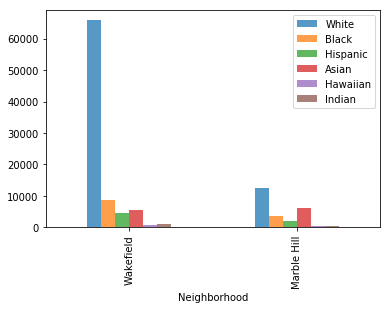

In [74]:
Population_Comparison=new_NY_population1.loc[[NYi1,NYi2]]
Population_Comparison.plot(kind='bar',alpha=0.75)
plt.show()

In [75]:
Population_Comparison['Indian']

Neighborhood
Wakefield      1099
Marble Hill     397
Name: Indian, dtype: int64

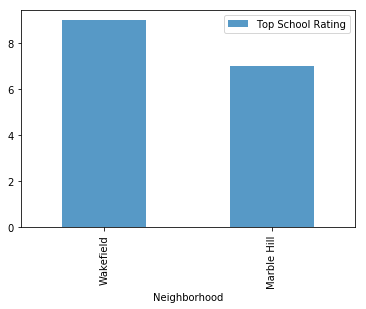

In [76]:
School_rating_comparison=NY_school_ratings.loc[[NYi1,NYi2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);
plt.show()

In [77]:
School_rating_comparison

Top School Rating
Neighborhood                   
Wakefield                     9
Marble Hill                   7

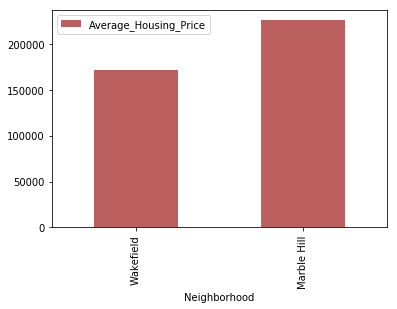

In [80]:
Avg_housing_price_comparison=NY_Avg_HousingPrice.loc[[NYi1,NYi2]]
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='brown');
plt.show()

In [81]:
Avg_housing_price_comparison

Average_Housing_Price
Neighborhood                       
Wakefield                  172050.0
Marble Hill                225800.0

# **Conclusion:**

This Analysis concludes that the two places of New York Wakefield , Marble Hill both has great amenities and locality,
but out of these two Wakefield has better prospects for buying houses or choose for rental houses.Wakefield has the higher number of Indian population ,good school rating of 9 and a reasonable avg housing price of around 172k ,also top 10 common venues shows Wakefield has got a good neighborhood with Laundromat, Pharmacy,Food Truck,Clothing Store , Pizza Place, Donut Shop and many more. Hence Wakefield wins over Marble Hill!
<br><br>
This study helps user to compare two neighborhood and recommend options with facts.

